# Introduction to the DEA Intertidal Product Suite <img align="right" src="../Supplementary_data/dea_logo.jpg">

The DEA Intertidal product suite is the next generation of DEA intertidal products that have been used across government and industry, helping to better characterise and understand the complex intertidal zone that is often defined as the interface between land and sea.   

Incorporating both Sentinel-2 and Landsat data, the product suite adds a temporal component to our elevation product for the intertidal zone, enabling users to better monitor and understand some of the most dynamic regions of Australia’s coastlines. With an improved tidal modelling capability, the product suite has been expanded to include a continental scale mapping of intertidal exposure over time, enabling scientists and managers to integrate the data into ecological and migratory species applications and modelling.  

## Background

The DEA Intertidal product suite is the next generation of intertidal products developed in DEA, leveraging our approach of combining time-series earth observation data with tidal modelling to create continental scale products for the intertidal region. The Intertidal Suite improves on the DEA Intertidal Elevation Model (also known as the [National Intertidal Digital Elevation Model or NIDEM](https://knowledge.dea.ga.gov.au/data/product/dea-intertidal-elevation-landsat) ) and adds several new features and products to help users better understand the intertidal environment and interpret the data.  

NIDEM was the first 3D model of Australia’s intertidal zone - the area of coastline exposed and flooded by ocean tides. The DEA Intertidal Suite fundamentally changes and improves the way in which we model the intertidal zone when compared to the original NIDEM elevation model and includes:  
- The addition of Sentinel-2 data to improve the spatial resolution of the model to 10 m, compared to the 25 m of the original NIDEM.  
- Incorporation of a new pixel-based method that supports a reduction in the temporal epoch of the product to 3 years (in comparison to 28 years in NIDEM), improving the ability to capture the current state of dynamic coastal environments, and enabling change-over-time applications using annual epochs.  
- Quantification of the vertical uncertainty of the elevation model.  
- An Intertidal Exposure model at 10 m resolution to examine spatiotemporal patterns of exposure and inundation across the intertidal zone, supporting migratory species studies and habitat mapping applications.  
- Tidal metrics to enable users to understand the varied ranges and distributions of tidal stages observed by the Landsat and Sentinel-2 satellites across Australia, and how this information can be used to better understand and interpret the products.  
- The implementation of an ensemble tidal modelling approach, acknowledging the wide range of global and regional tide models available and their varying performance across different regions of Australia.

## Description

This notebook introduces the Digital Earth Australia (DEA) Intertidal Product Suite.
All datasets are produced by DEA and are accessible in the DEA product archive.
In addition to access here in the DEA Sandbox, they can also be explored via [DEA Maps](https://maps.dea.ga.gov.au/) and are available directly via [DEA Explorer](https://explorer.dea.ga.gov.au/).
See the [DEA Knowledge Hub product description](https://knowledge.dea.ga.gov.au/data/theme/sea-ocean-and-coast/) for further information, including a comprehensive review of the methods employed in the generation of datasets in this product suite.

In this notebook, users will:
- learn about the datasets and how they are inter-related
- interact with datasets including how to load your own area-of-interest, visualise, interpret and export data in GIS-ready formats
- explore basic use cases

By the end of this notebook, users should have an understanding of what these datasets are, how they can be used and any limitations they should be aware of.

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 
Press the ▶️ button at the top of this notebook to run cell-by-cell or select the `Run` drop-down menu and select `Run All Cells`

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import datacube
import cmocean
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.core.display import Video
from ipywidgets import Output, GridspecLayout

import odc.geo.xr
from datacube.utils.cog import write_cog
from datacube.utils.masking import mask_invalid_data
from dea_tools.plotting import display_map, xr_animation, rgb

### Connect to the datacube

Connect to the datacube so we can access DEA data.
The `app` parameter is a unique name for the analysis which is based on the notebook file name.

In [2]:
dc = datacube.Datacube()

### Analysis parameters

For your first run through this notebook, use the coordinates and dates outlined in the following cell.
Once you have worked through the notebook, return to the following cell to customise the location and dates.
For future uses of this notebook, this is the only cell in the notebook where you need to change any of the input parameters (`y`, `x` and `time` values).

In [3]:
# Identify your area of interest as EPSG:4326 coordinates as well your nominated time period as start and end dates

study_area = "Port_Canarvon_WA"
query_params = dict(
                y=(-24.89068, -24.90967), 
                x=(113.63545, 113.64924), 
                time=("2016", "2022")
                   )

# View the area of interest over a generic basemap. Data will be loaded inside the red bounding box.
display_map(x=query_params["x"], y=query_params["y"])

## Available products and measurements

The DEA Intertidal product suite contains three (3) core datasets, seven (7) tidal attribute (ta) layers, and two (2) quality assessment (qa) layers, all available as continental 10 m resolution GeoTIFFs for the Australian coastal and intertidal region.  

All datasets are produced annually from a three-year composite of input data from the combined Sentinel 2 and Landsat 7, 8 and 9 DEA Collection 3 surface reflectance products. The product time series commences from 2016, with datasets labelled by the middle year of data (e.g. the 2017 layer combines data from 2016, 2017 and 2018). Updates to the product suite are scheduled annually.

Before exploring the datasets, view the product and measurements list in the DEA database.
Here you can inspect the product status and view some of the important data metrics such as the data type, units and no data values.

### List Products

Inspect the intertidal dataset in the DEA database

In [4]:
product = "ga_s2ls_intertidal_cyear_3"
products = dc.list_products()
products.loc[product]

name                                         ga_s2ls_intertidal_cyear_3
description           Geoscience Australia Sentinel-2 Landsat Intert...
license                                                       CC-BY-4.0
default_crs                                                        None
default_resolution                                                 None
Name: ga_s2ls_intertidal_cyear_3, dtype: object

### List Measurements

Inspect the measurements and data properties available in the DEA Intertidal dataset

In [5]:
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
elevation,elevation,float32,metres above MSL,NaN,NaN,NaN
elevation_uncertainty,elevation_uncertainty,float32,metres,NaN,[uncertainty],NaN
exposure,exposure,uint8,percent,255,NaN,NaN
ta_hat,ta_hat,float32,metres above MSL,NaN,[hat],NaN
ta_hot,ta_hot,float32,metres above MSL,NaN,[hot],NaN
ta_lot,ta_lot,float32,metres above MSL,NaN,[lot],NaN
ta_lat,ta_lat,float32,metres above MSL,NaN,[lat],NaN
ta_offset_high,ta_offset_high,uint8,percent,255,[offset_high],NaN
ta_offset_low,ta_offset_low,uint8,percent,255,[offset_low],NaN


## Load data

In the following cell, the data will be loaded for the identified area of interest and dates for both the DEA Intertidal Product Suite as well as an [annual imagery composite dataset (GeoMAD)](https://knowledge.dea.ga.gov.au/data/product/dea-geometric-median-and-median-absolute-deviation-landsat/?tab=overview) that is useful to compare our output datasets against.

In [6]:
# Load the DEA Intertidal data suite for the area of interest
load_params = dict(dask_chunks={'x': 500, 'y': 500})

ds = dc.load(product="ga_s2ls_intertidal_cyear_3", **query_params, **load_params)

ds = mask_invalid_data(ds)
ds.load()

# # Additionally, load the median annual Landsat 8 imagery for the area of interest
geoMAD = dc.load(product="ga_ls8c_nbart_gm_cyear_3", like=ds, resampling="cubic")

# Inspect the DEA Intertidal dataset
ds

<xarray.Dataset>
Dimensions:                (time: 7, y: 232, x: 167)
Coordinates:
  * time                   (time) datetime64[ns] 2016-07-01T23:59:59.999999 ....
  * y                      (y) float64 -2.822e+06 -2.822e+06 ... -2.824e+06
  * x                      (x) float64 -1.828e+06 -1.828e+06 ... -1.827e+06
    spatial_ref            int32 3577
Data variables:
    elevation              (time, y, x) float32 nan nan nan nan ... nan nan nan
    elevation_uncertainty  (time, y, x) float32 nan nan nan nan ... nan nan nan
    exposure               (time, y, x) float32 nan nan nan nan ... nan nan nan
    ta_hat                 (time, y, x) float32 0.7894 0.7894 ... 0.8385 0.8385
    ta_hot                 (time, y, x) float32 0.7203 0.7203 ... 0.7703 0.7703
    ta_lot                 (time, y, x) float32 -0.5554 -0.5555 ... -0.6786
    ta_lat                 (time, y, x) float32 -0.8659 -0.8659 ... -0.9207
    ta_offset_high         (time, y, x) float32 4.0 4.0 4.0 4.0 ... 3.0 3.0 3.0
    ta_offset_low          (time, y, x) float32 18.0 18.0 18.0 ... 13.0 13.0
    ta_spread              (time, y, x) float32 77.0 77.0 77.0 ... 82.0 82.0
    qa_ndwi_corr           (time, y, x) float32 nan nan nan nan ... nan nan nan
    qa_ndwi_freq           (time, y, x) float32 0.0 0.0 0.0 ... 99.0 99.0 99.0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Defining the Intertidal Zone

The intertidal zone is biophysically characterised as the intersecting coastal region between land and sea, specifically, the area that is intermittently inundated by the tide.
In this work, we have developed a technical definition of the intertidal zone that translates this biophysical definition and applies it to multitemporal spectral satellite imagery.
The datasets used to identify intertidal pixels are offered as part of the DEA Intertidal product suite as a measure of quality assurance.

The pixel-based definition applied in this work relies upon an application of the [normalised difference water index (NDWI)](https://www.sciencedirect.com/science/article/pii/S0034425796000673) over timeseries imagery.
In this two step process, the wetness frequency of the pixel is first calculated, based upon the application of the NDWI over the timeseries in the epoch (Figure 1a).
For example, a timestep labelled '2019' encompasses datasets from 2018, 2019 and 2020 which are all used in the calculation.
Areas that are permanently wet, such as the ocean or persistent inland waterbodies, have a wetness frequency of 100 % whereas pixels that are never inundated by water are considered dry and have a wetness frequency of 0 %.
Intertidal candidate pixels are considered to have wetness frequencies between 1 and 99 % in this work.

The second step of our intertidal pixel definition acknowledges that some areas show wetting and drying patterns that are not explicitly tidally linked due to factors including seasonality and inland flooding.
In this step, we correlate (Figure 1b) the wetness frequency results in Figure 1a to our ensemble tidal model.
We use a threshold of correlation (p) greater than or equal to 0.15 to qualify as a high confidence intertidal pixel (Figure 1c).
These pixels qualify for inclusion in the DEA Intertidal product suite datasets which are discussed in further detail in the following sections.

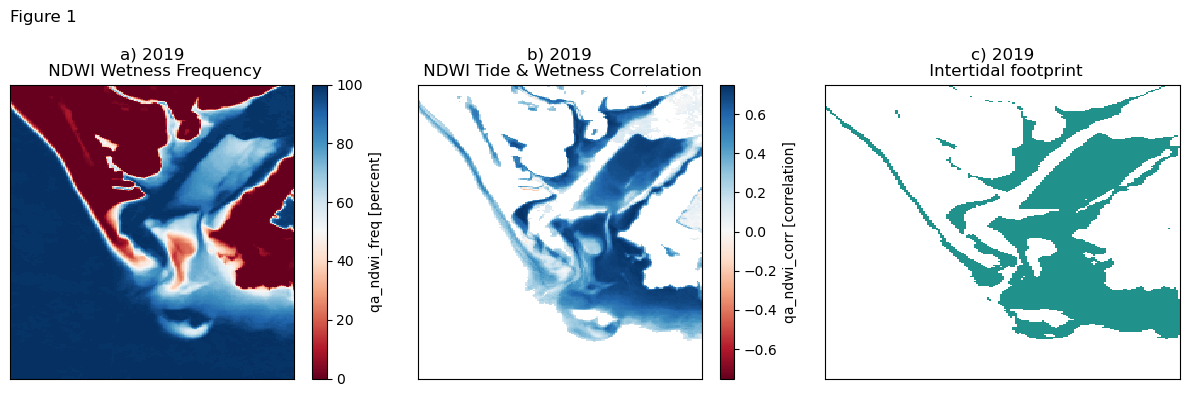

In [7]:
# Plot the NDWI wetness frequency and tidal correlations for the fourth timestep

# Setup the figure
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

# Identify a single timestep to inspect
time = 3

# Assign the datasets to the figure
ds.qa_ndwi_freq.isel(time=time).plot(cmap="RdBu", ax=ax[0])
ds.qa_ndwi_corr.isel(time=time).plot(ax=ax[1], cmap="RdBu")
ds.elevation.isel(time=time).where(ds.elevation.isel(time=time).isnull(), 1, drop=True).plot(ax=ax[2], add_colorbar=False)

# Tidy up the axes
ax[0].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[1].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[2].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)

ax[0].set(xlabel=None, ylabel=None)
ax[1].set(xlabel=None, ylabel=None)
ax[2].set(xlabel=None, ylabel=None)

# Label the figure plots
ax[0].set_title("a) 2019\n NDWI Wetness Frequency")
ax[1].set_title("b) 2019\n NDWI Tide & Wetness Correlation")
ax[2].set_title("c) 2019\n Intertidal footprint")
fig.suptitle("Figure 1", x=0.04)

plt.tight_layout()

## Intertidal Elevation and Uncertainty

### Description

DEA Intertidal Elevation provides elevation in metre units relative to modelled Mean Sea Level for each pixel of the satellite-observed exposed intertidal zone across the Australian coastline.
The elevation model is generated from DEA Landsat and Sentinel-2 data surface reflectance from each three-year composite period, utilising a pixel-based approach based on Ensemble Tidal Modelling. 
For every pixel, the time-series of surface reflectance data is converted to the Normalised Difference Water Index (NDWI), and each observation tagged with the tidal height modelled at the time of acquisition by the satellite. 
A rolling median is applied from low to high tide to reduce noise (e.g. white water, sunglint, non-tidal water level variability), then analysed to identify the tide height at which the pixel transitions from dry to wet. This tide height represents the elevation of the pixel. 

The companion dataset, DEA Intertidal Elevation Uncertainty, provides a measure of the quality of each modelled elevation value in metre units. 
Uncertainty is calculated by assessing how cleanly the modelled elevation separates satellite observations into dry and wet observations. 
This is achieved by identifying satellite observations that were misclassified by the modelled elevation (e.g. pixels that were observed as wet at tide heights lower than the modelled elevation or observed dry at higher tide heights). 
The spread of the tide heights of these misclassified points are then summarised using a robust Median Absolute Deviation statistic. 
Common causes of high elevation uncertainty can be poor tidal model performance, rapidly changing intertidal morphology, or noisy underlying satellite data.  

### Plot and View

In [8]:
# Inspect the elevation and uncertainty data for the fourth timestep (2019)
ds[["elevation", "elevation_uncertainty"]].isel(time=time)

<xarray.Dataset>
Dimensions:                (y: 232, x: 167)
Coordinates:
    time                   datetime64[ns] 2019-07-02T11:59:59.999999
  * y                      (y) float64 -2.822e+06 -2.822e+06 ... -2.824e+06
  * x                      (x) float64 -1.828e+06 -1.828e+06 ... -1.827e+06
    spatial_ref            int32 3577
Data variables:
    elevation              (y, x) float32 nan nan nan nan ... nan nan nan nan
    elevation_uncertainty  (y, x) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

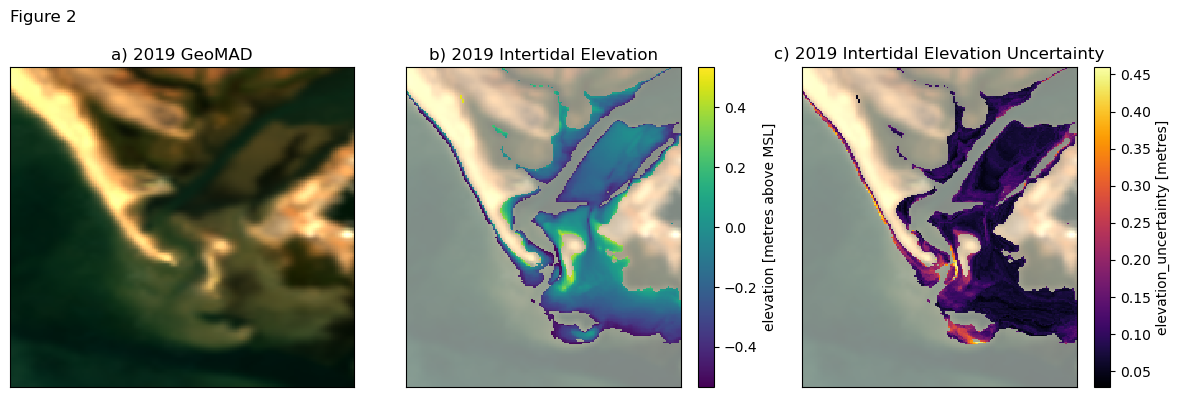

In [9]:
# Plot the intertidal elevation and uncertainty for the fourth timestep

# Setup the figure
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

# Assign the datasets to the figure
rgb(geoMAD.isel(time=time), bands=["red", "green", "blue"], ax=ax[0])

rgb(geoMAD.isel(time=time), bands=["red", "green", "blue"], ax=ax[1], alpha=0.5)
ds.elevation.isel(time=time).plot(ax=ax[1], cmap="viridis")

rgb(geoMAD.isel(time=time), bands=["red", "green", "blue"], ax=ax[2], alpha=0.5)
ds.elevation_uncertainty.isel(time=3).plot(ax=ax[2], cmap="inferno")

# Tidy up the axes
ax[0].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[1].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[2].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)

ax[0].set(xlabel=None, ylabel=None)
ax[1].set(xlabel=None, ylabel=None)
ax[2].set(xlabel=None, ylabel=None)

# Label the figure plots
ax[0].set_title("a) 2019 GeoMAD")
ax[1].set_title("b) 2019 Intertidal Elevation")
ax[2].set_title("c) 2019 Intertidal Elevation Uncertainty")
fig.suptitle("Figure 2", x=0.04)

plt.tight_layout()

### Interpretation

Figure 2a shows the median appearance of the location of interest during the time period.
Note though that tidal position is *not* factored into this image and is used here to provide context to the DEA Intertidal results only.

Figure 2b shows the intertidal elevation at this location for the period 2018 to 2020 and is labelled as 2019. 
The spatial footprint of the intertidal area includes only pixels that are identified as intertidal with a high level of confidence ([Figure 1c](#Defining-the-Intertidal-Zone)).
Users of this data should also be aware that there is a satellite-observed bias in many locations against detection of the full astronomical tidal range by orbiting satellites such as Landsat and Sentinel-2.
The bias is introduced by regular daily satellite overpass times that fail to overlap with the timing of tides in the upper or lower tidal range.
Consequently, any satellite-derived intertidal dataset may be subject to incomplete mapping of the full tidal range. 
We have mapped the extent of these tidal biases and provide a relative measure of how completely our satellite-observed datasets observe the full astronomical tidal range.
For further discussion, see the [Tidal Observation Attributes section](#Tidal-Observation-Attributes).

Figure 2c shows the vertical uncertainty of the elevation measurements. Patterns in the uncertainty dataset reflect the relative stability of the pixel during the epoch with dynamic areas producing greater uncertainty values compared to stable sites.
Other patterns in the uncertainty data reflect the input image quality and quantity as well as the quality of the tidal modelling for any given location.

The elevation and uncertainty measurements are both reported in metres above sea level.

## Intertidal Exposure

### Description

DEA Intertidal Exposure models the relative amount of time that any intertidal pixel is exposed from water coverage. Exposure is calculated by comparing the pixel elevation back against a high frequency model of tide heights for that location, based on the Ensemble Tidal Modelling approach. 
The Exposure dataset reflects the percentage of time any given pixel, of known elevation, is exposed from tidal inundation, calculated as the fraction of exposed observations relative to the total number of observations generated in the high temporal resolution tidal model for the three-year product epoch.   

### Plot and View

In [10]:
# Inspect the exposure data for the fourth timestep (2019)
ds["exposure"].isel(time=time)

<xarray.DataArray 'exposure' (y: 232, x: 167)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time         datetime64[ns] 2019-07-02T11:59:59.999999
  * y            (y) float64 -2.822e+06 -2.822e+06 ... -2.824e+06 -2.824e+06
  * x            (x) float64 -1.828e+06 -1.828e+06 ... -1.827e+06 -1.827e+06
    spatial_ref  int32 3577
Attributes:
    units:         percent
    nodata:        255
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

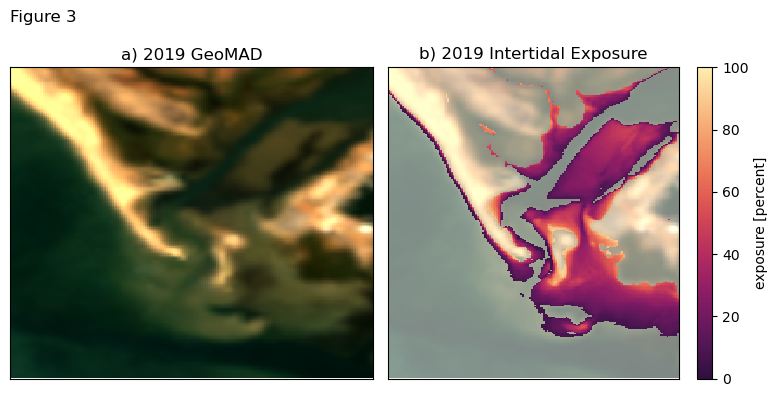

In [11]:
# Plot the intertidal exposure for the fourth timestep

# Setup the figure
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

# Assign the datasets to the figure
rgb(geoMAD.isel(time=time), bands=["red", "green", "blue"], ax=ax[0])

rgb(geoMAD.isel(time=time), bands=["red", "green", "blue"], ax=ax[1], alpha=0.5)
ds.exposure.isel(time=time).plot(ax=ax[1], cmap=cmocean.cm.matter_r, vmin=0, vmax=100)

# Tidy up the axes
ax[0].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[1].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)

ax[0].set(xlabel=None, ylabel=None)
ax[1].set(xlabel=None, ylabel=None)

# Label the figure plots
ax[0].set_title("a) 2019 GeoMAD")
ax[1].set_title("b) 2019 Intertidal Exposure")
fig.suptitle("Figure 3", x=0.06)

plt.tight_layout()

### Interpretation

Figure 3a (2019 GeoMAD) shows the median appearance of the location of interest during the time period of interest, as in Figure 1a, and is used to contextualise the results in 3b.

Figure 3b shows Intertidal Exposure for the area of interest during the period 2018-2020 (labelled 2019). 
The intertidal exposure values represent the relative amount of time that each pixel was exposed to the atmosphere, as a percentage of all time during the three year period of interest.

The spatial footprint of the intertidal area includes only pixels that are identified as intertidal with a high level of confidence ([Figure 1c](#Defining-the-Intertidal-Zone)).
Although the relative distribution of values and patterns in the output Exposure dataset appears similar to Intertidal Elevation, Intertidal Exposure values account for patterns and astronomical influences on the frequency tide model for the epoch at the location of interest.
These differences are usually most apparent at the highest and lowest ends of the modelled tide range and are influenced by factors including the tidal pattern of the location and lunar cycling.

Furthermore, depending on the location of interest, either or both of these tide-range extrema values may be absent from the Intertidal Exposure results dataset.
This data gap is caused by a satellite observed offset in image acquisition of the full astronomical tidal range across Australia which varies with both latitude and longitude.
We have mapped the extent of these tidal biases and provide a relative measure of how completely our satellite-observed datasets observe the full astronomical tidal range.
For further discussion, see the [Tidal Observation Attributes section](#Tidal-Observation-Attributes).

## Tidal Attributes

The DEA Intertidal Tidal Attributes (ta) are a suite of datasets that describe the modelled (Astronomical) and satellite-observed (Observed) tidal attributes, as well as some satellite-sensor specific behaviors, that relate to every coastal pixel.
These datasets describe fundamental tidal characteristics for each pixel that both underpin the workflows included in the DEA Intertidal Product Suite, and are important to understand for complete interpretation of all satellite-derived intertidal datasets.

The DEA Intertidal Tidal Attributes are grouped into two categories: the highest and lowest Observed and Astronomical tides, and the satellite observed tidal offsets.

### Highest and Lowest Astronomical and Satellite-Observed Tides

Datasets of the highest and lowest astronomical and satellite-observed tide heights are foundational metadata that describe some satellite and tidal behaviors around the coastline.
These datasets are used to produce the following satellite-observed tidal offset datasets which are useful to understand how tide heights are mapped around the coastline and to interpret satellite-derived intertidal datasets.

In this work, the astronomical tide heights are considered to be the modelled tide heights, generated from the ensemble tidal modelling workflow.

#### Description

The following four datasets characterise Astronomical and Observed tides

| Variable name | Description |
| ---- | --- |
|ta_lot| The lowest observed tide dataset maps the lowest observed tide (LOT) of the satellite time-series at each pixel during the analysis epoch, based on ensemble tide modelling. |
|ta_hot| The highest observed tide dataset maps the highest observed tide (HOT) of the satellite time-series at each pixel during the analysis epoch, based on ensemble tide modelling. |
|ta_lat| The lowest astronomical tide dataset maps the lowest astronomical tide (LAT) for each pixel as modelled by the ensemble tide model for the analysis epoch. Note that the LAT modelled for the analysis epoch may differ from the LAT modelled across all-time for any given location. |
|ta_hat| The highest astronomical tide dataset maps the highest astronomical tide (HAT) for each pixel as modelled by the ensemble tide model for the analysis epoch. Note that the HAT modelled for the analysis epoch may differ from the HAT modelled across all-time for any given location. |

#### Plot and View

In [12]:
# Inspect the data for the fourth timestep (2019)
ds[["ta_lot", "ta_hot", "ta_lat", "ta_hat"]].isel(time=time)

<xarray.Dataset>
Dimensions:      (y: 232, x: 167)
Coordinates:
    time         datetime64[ns] 2019-07-02T11:59:59.999999
  * y            (y) float64 -2.822e+06 -2.822e+06 ... -2.824e+06 -2.824e+06
  * x            (x) float64 -1.828e+06 -1.828e+06 ... -1.827e+06 -1.827e+06
    spatial_ref  int32 3577
Data variables:
    ta_lot       (y, x) float32 -0.6405 -0.6405 -0.6406 ... -0.6532 -0.6532
    ta_hot       (y, x) float32 0.7302 0.7302 0.7302 ... 0.7306 0.7306 0.7306
    ta_lat       (y, x) float32 -0.8885 -0.8886 -0.8886 ... -0.8977 -0.8977
    ta_hat       (y, x) float32 0.8039 0.8039 0.8039 ... 0.8066 0.8066 0.8066
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

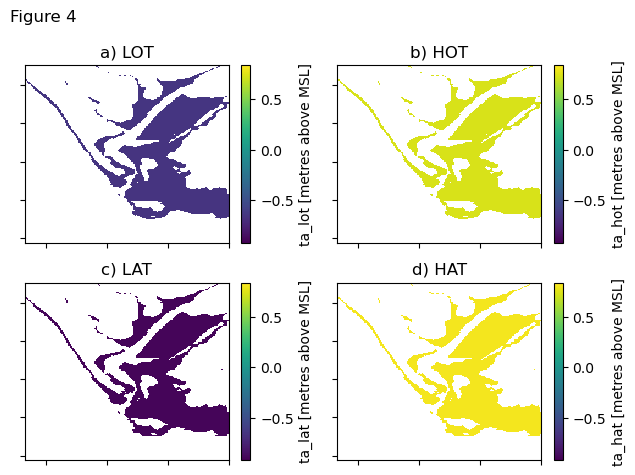

In [13]:
# Plot the data

# Identify the maxima and minima from the combined arrays to enable plotting them on a single color scale
minmax = np.array(
    [
        ds.ta_lot.min(),
        ds.ta_lot.max(),
        ds.ta_lat.min(),
        ds.ta_lat.max(),
        ds.ta_hot.min(),
        ds.ta_hot.max(),
        ds.ta_hat.min(),
        ds.ta_hat.max(),
    ]
)

# Prepare the figure
fig, axs = plt.subplots(2, 2)

# Add the datasets to the figure
ds.ta_lot.isel(time=time).where(ds.elevation.isel(time=time).notnull()).plot(
    ax=axs[0, 0], vmin=minmax.min(), vmax=minmax.max()
)
ds.ta_hot.isel(time=time).where(ds.elevation.isel(time=time).notnull()).plot(
    ax=axs[0, 1], vmin=minmax.min(), vmax=minmax.max()
)
ds.ta_lat.isel(time=time).where(ds.elevation.isel(time=time).notnull()).plot(
    ax=axs[1, 0], vmin=minmax.min(), vmax=minmax.max()
)
ds.ta_hat.isel(time=time).where(ds.elevation.isel(time=time).notnull()).plot(
    ax=axs[1, 1], vmin=minmax.min(), vmax=minmax.max()
)

# Prepare the labels
axs[0, 0].set_title("a) LOT")
axs[0, 1].set_title("b) HOT")
axs[1, 0].set_title("c) LAT")
axs[1, 1].set_title("d) HAT")
fig.suptitle("Figure 4", x=0.06)

# Format the plot
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticklabels(labels="")
    ax.set_yticklabels(labels="")
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

#### Interpretation

Lowest and Highest Observed Tides (Figures 4 a-b) are calculated by attributing tide heights to all satellite imagery over a location for the accompanying date and time of image acquisition and then identifying the lowest observed height (LOT, Figure 4a) and the highest observed height (HOT, Figure 4b) from the imagery stack. 
Conversely, Lowest and Highest Astronomical Tides (Figures 4 c-d) represent minima and maxima elevations for any location, based on the global tide modelling used in this work.
Users should note though that due to our epoch-based approach, all LOT, HOT, LAT and HAT values also represent the epoch only and are not representative of all-time values. 
Oceanic pixels immediately adjacent to these intertidal regions follow the mapped intertidal trends.

This difference in absolute tide elevation values is attributed to the regular timing of astronomical influences on tide and overpass times of the Landsat and Sentinel-2 polar orbiting satellites.
Astronomical tide heights represent water elevations in oceanic and intertidal settings that are modelled, based on well characterised astronomical influences.
These influences typically relate to Earth and lunar orbits and their relative positions to one another, with gravitational affects from the moon most influential on local spatial scales at nighttime.
Note though that astronomical tidal modelling does not incorporate non-tidal influences such as sea-level rise and storm surge.
On the contrary, the overpass and image acquisition time of polar orbiting satellites is held constant to ensure maximum illumination with minimum atmospheric water vapor (haze and cloud build-up). 
The orbits of [Landsat 8 and Landsat 9](https://www.usgs.gov/faqs/what-are-acquisition-schedules-landsat-satellites) and [Sentinel-2](https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-2/satellite-description/orbit) are scheduled with local overpass times of 10:00 a.m. to 10:30 a.m.
The regularity of these overpass times introduces biases to the imaged range of tidal elevations for any given location.
Local geography and astronomical influences on tide modelling ensure that the full range of modelled tide elevations are rarely accounted for during these single satellite overpass times (Figure 5).

The comparison of Highest and Lowest Observed Tide heights (HOT/LOT) against the Highest and Lowest Astronomical Tides (HAT/LAT) enables identification of intertidal locations, at the pixel scale, where satellite observations of the tidal range are at odds with the modelled astronomical maxima/minima for the site.
These biases and offsets are quantified in further detail the following section.

### Satellite-Observed Tidal Offsets
Satellite-observed tidal offsets were introduced by [Bishop-Taylor et al (2019)](https://www.sciencedirect.com/science/article/pii/S0272771418308783) (Figure 5).

![Figure 5](https://ars.els-cdn.com/content/image/1-s2.0-S0272771418308783-gr8.jpg) 
> **Figure 5** The distribution of Landsat observations relative to the full tidal range (after [Bishop-Taylor et al., 2019](https://www.sciencedirect.com/science/article/pii/S0272771418308783#sec3)). Light colours in the left panels indicate poor coverage of the tidal range by Landsat: light colours in (a) indicate polygons where Landsat observed a small ‘spread’ calculated as a proportion of the full tidal range. Light colours in (b) and (c) represent polygons where Landsat observations were biased away from low or high tides respectively. For example, a polygon with a spread of 0.7, a high tide offset of 0.05 and a low tide offset of 0.25 indicates that Landsat observed 70% of the tidal range, but did not image the highest 5% or lowest 25% of tide heights. 

#### Description
The datasets included in this part of the DEA Intertidal Product Suite capture these satellite-tide characteristics, and include, for every coastal pixel, the:
| Variable name | Description |
| ---- | --- |
| ta_spread| The tidal spread dataset provides the percentage of the full astronomical tidal range observed by the time series of satellite observations at each pixel (see Figure 1a). DEA Intertidal Spread takes the concept of satellite tide bias, introduced in Bishop-Taylor et al (2019) and applies it at a pixel scale to demonstrate the fraction of the full tide range that was sensor observed during the analysis epoch at that location. In this work, we define the astronomical tide range as that modelled by the ensemble tide modelling approach. |
| ta_offset_low | The low tide offset dataset quantifies the proportion of the lowest tides never observed by satellites at each pixel (as a percentage of the astronomical tide range). It is calculated by measuring the offset between the lowest astronomical tide (LAT) and the lowest satellite-observed tide (LOT; see figure 1b). A high value indicates that DEA Intertidal datasets may not map the lowest regions of the intertidal zone.  |
| ta_offset_high | The high tide offset dataset quantifies the proportion of the highest tides never observed by satellites at each pixel (as a percentage of the astronomical tide range). It is calculated by measuring the offset between the highest astronomical tide (HAT) and the highest satellite-observed tide (HOT; see Figure 1c). A high value indicates that DEA Intertidal datasets may not map the highest regions of the intertidal zone. |

#### Plot and View

In [14]:
# Inspect the data for the fourth timestep (2019)
ds[["ta_offset_high", "ta_offset_low", "ta_spread"]].isel(time=time)

<xarray.Dataset>
Dimensions:         (y: 232, x: 167)
Coordinates:
    time            datetime64[ns] 2019-07-02T11:59:59.999999
  * y               (y) float64 -2.822e+06 -2.822e+06 ... -2.824e+06 -2.824e+06
  * x               (x) float64 -1.828e+06 -1.828e+06 ... -1.827e+06 -1.827e+06
    spatial_ref     int32 3577
Data variables:
    ta_offset_high  (y, x) float32 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0 4.0
    ta_offset_low   (y, x) float32 14.0 14.0 14.0 14.0 ... 14.0 14.0 14.0 14.0
    ta_spread       (y, x) float32 80.0 80.0 80.0 80.0 ... 81.0 81.0 81.0 81.0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

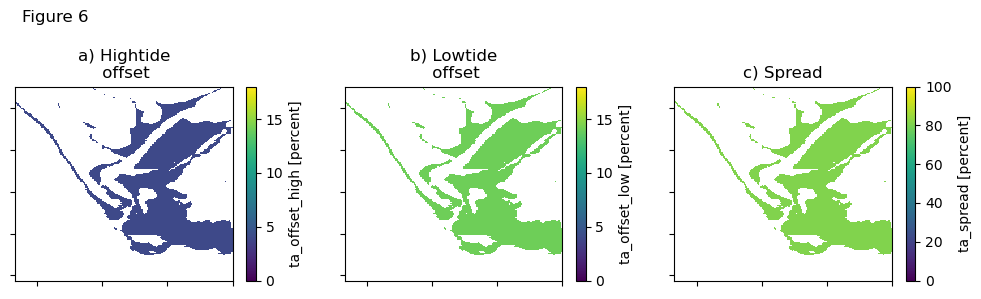

In [15]:
# Plot the data

# Identify the dataset maxima/minima to adjust the plot colourbar
minmax_offsets = np.array([
                         ds.ta_offset_high.min(),
                         ds.ta_offset_high.max(),
                         ds.ta_offset_low.min(),
                         ds.ta_offset_low.max(),
                         ])

# Prepare the figure
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Add the datasets to the figure
ds.ta_offset_high.isel(time=time).where(ds.elevation.isel(time=time).notnull()).plot(
    ax=axs[0], vmin=0, vmax=minmax_offsets.max()
)

ds.ta_offset_low.isel(time=time).where(ds.elevation.isel(time=time).notnull()).plot(
    ax=axs[1], vmin=0, vmax=minmax_offsets.max()
)

ds.ta_spread.isel(time=time).where(ds.elevation.isel(time=time).notnull()).plot(
    ax=axs[2], vmin=0, vmax=100
)

# Prepare the figure labels
axs[0].set_title("a) Hightide\n offset")
axs[1].set_title("b) Lowtide\n offset")
axs[2].set_title("c) Spread")
fig.suptitle("Figure 6", x=0.06)

# Format the plot
for ax in axs.flat:
    ax.set_xticklabels(labels="")
    ax.set_yticklabels(labels="")
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

#### Interpretation

Figure 6 represents a pixel based interpretation (10 m<sup>2</sup>) of [Figure 5](#Satellite-Observed-Tidal-Offsets) whereby the relative difference between modelled (Astronomical) and satellite-observed tide heights are quantified.

Figure 6a considers the hightide offset - the relative difference between the observed and astronomical hightide elevations.
An offset of 10 %, for example, indicates that the highest 10 % of astronomical tides are not observed by the satellite at this location, for the time period of interest.
The lower the value, the more closely the satellite-observed tides match the full astronomical tide range.

Similarly in Figure 6b, the lowest values represent the closest alignment of satellite-observed and astronomical measurements of lowtide heights.

These two concepts are bought together in the measure of spread (Figure 6c).
The tidal spread is an indicator of the range of tide heights observed for a given location, as a percentage of the full astronomical range, during the time period of interest.
A value of 80 % for example, indicates that most of the tide range was imaged by satellite.
However, it does not tell you how much of the satellite bias occurs at either end of the high and low tide range.

It is intended that these datasets be used to support the interpretation of satellite-derived intertidal datasets.
The methods employed in the DEA Intertidal product suite are applied to pixels that are determined as [intertidal](#Defining-the-Intertidal-Zone) only and these pixels are derived exclusively from what the satellite has observed.
At the continental scale, it is envisioned that these tidal attribute datasets will support users to understand how comprehensively their areas of interest have been mapped and whether these datasets are suitable for their purposes.

Further exploration of these concepts can be found in the DEA Notebooks repository, available on the [DEA Sandbox](https://app.sandbox.dea.ga.gov.au ) for an interactive version, and for a static version, here in the [DEA Knowledge Hub](https://knowledge.dea.ga.gov.au/notebooks/How_to_guides/Tidal_modelling/#Evaluating-tidal-biases-using-tidal_stats).

# Use Case

We will now investigate a time-series application of the DEA Intertidal datasets.

Continuing to use the data already loaded, animations of the time-series will demonstrate the identification and monitoring of a sandbank breach that impacted an important  navigation channel in Carnarvon, Western Australia during 2017.

Upon completion of this case study, users can identify their own [area of interest](#Analysis-parameters) in this notebook, load, view and animate the time-series and then download the geotiff data files for continued use in your own local GIS environments.

## Carnarvon channel blockage 

The Fascine channel is a waterway bordering the Carnarvon townsite and the Gascoyne River. It is one of the Carnarvon’s key assets, linking the community to the coast.
In 2017, the sand spit that protected the channel entrance and maintained the connection to the outer channel breached due to wave action.
This triggered excessive siltation of the entrance, closing the waterway to most vessels, with minimum depths of less than half a metre at low tide.

Time-series mapping of elevations in the channel over this period show the constant re-working of the channel entrance by mobile sandbanks.
Time-series mapping of changes in intertidal exposure demonstrates the potential impact this had on local biodiversity, dependent upon intertidal habitats.

#### View the breach
Plot and view the breaching sandbank and consequent infilling of the Fascine Channel. 
Compare the annual median view of the location against the changing annual intertidal elevation and intertidal elevation uncertainty for the area.

In [16]:
# Generate the time-series animations for the imagery, intertidal elevation and intertidal elevation uncertainty datasets

# Animate the imagery changes
xr_animation(
    ds=geoMAD,
    bands=["red", "green", "blue"],
    output_path="Carnarvon_Fascine_rgb_change_2016_to_2022.mp4",
    interval=1000,
    show_text="Figure 7a\n RGB",
    show_date="%Y",
    width_pixels=300,
)
plt.close()

# Animate the elevation changes
xr_animation(
    ds=ds,
    bands=["elevation"],
    output_path="Carnarvon_Fascine_elevation_change_2016_to_2022.mp4",
    interval=1000,
    imshow_kwargs={"cmap": "viridis"},
    show_text="Figure 7b\n Elevation",
    colorbar_kwargs={"colors": "black"},
    show_date="%Y",
    width_pixels=300,
)
plt.close()

# Animate the elevation uncertainty changes
xr_animation(
    ds=ds,
    bands=["elevation_uncertainty"],
    output_path="Carnarvon_Fascine_elevation_uncertainty_change_2016_to_2022.mp4",
    interval=1000,
    imshow_kwargs={"cmap": "inferno"},
    show_text="Figure 7c\n Uncertainty",
    colorbar_kwargs={"colors": "black"},
    show_date="%Y",
    width_pixels=300,
)
plt.close()

Exporting animation to Carnarvon_Fascine_rgb_change_2016_to_2022.mp4


  0%|          | 0/7 (0.0 seconds remaining at ? frames/s)

Exporting animation to Carnarvon_Fascine_elevation_change_2016_to_2022.mp4


  0%|          | 0/7 (0.0 seconds remaining at ? frames/s)

Exporting animation to Carnarvon_Fascine_elevation_uncertainty_change_2016_to_2022.mp4


  0%|          | 0/7 (0.0 seconds remaining at ? frames/s)

In [17]:
# View the animations simultaneously

filepaths = [
    "Carnarvon_Fascine_rgb_change_2016_to_2022.mp4",
    "Carnarvon_Fascine_elevation_change_2016_to_2022.mp4",
    "Carnarvon_Fascine_elevation_uncertainty_change_2016_to_2022.mp4",
]

grid = GridspecLayout(1, len(filepaths))

for i, filepath in enumerate(filepaths):
    out = Output()
    with out:
        display.display(
            display.Video(filepath, embed=True, html_attributes="loop autoplay")
        )
    grid[0, i] = out

grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

#### Interpretation

The multi-temporal aspect of the DEA Intertidal product suite delivers the ability to track and monitor coastal change over time.

The RGB imagery (Figure 7a) shows the exposed sandbanks as the brightest feature in the animation.
As the timeseries progresses, the longest seaward sandbank is shown to breach and break up in 2017.
Over time, sediments are redeposited and reconfigured in the channel mouth area and the outer sandbank begins to lengthen again around 2021.

These changes in the intertidal sediment distrubtions are reflected in the intertidal elevation which is modelled in the central panel (Figure 7b).
The intertidal elevation uncertainty (Figure 7c) reflects the highly dynamic areas in the brightest colours as the largest uncertainties are attached to the most dynamic pixels.
The darkest regions are associated with low levels of uncertainty and are fairly stable across the timeseries.

## Changes to the Carnarvon Intertidal Habitat

Carnarvon and adjacent coastal environments are located within the Gascoyne Coast Bioregion, a global hotspot for tropical reef endemism and the second most diverse marine environment in the world for tropical reef species [(fish.wa.gov.au).](https://www.fish.wa.gov.au/Documents/sofar/status_reports_of_the_fisheries_and_aquatic_resources_2015-16_gascoyne_bioregion.pdf)
The region boasts an extensive array of marine life including sharks, rays, turtles, dugongs and seabirds as well as significant stretches of habitat that include seagrass, reefs and mangroves.
The intertidal zone is a critical staging ground for the interaction between many of these species and habitats.
It is therefore essential to deeply understand the dynamics and characteristics of the intertidal zone to appropriately monitor and conserve threatened coastal species.

The Intertidal Exposure model offers an ecological perspective on the distribution of space within the intertidal zone.
Exposure time influences the species distribution of intertidal seagrasses (and consequently, turtle, dugong and ray distributions), foraging and roosting locations of seabirds, and even geochemical interactions.

#### View and quantify the changing intertidal area
In this example, the DEA Intertidal Exposure model will be used to explore the influence of exposure on the potential occupation space for wildlife in the area.

In [18]:
# Generate the time-series animations for the imagery, intertidal exposure and spread and offset attributes

# Animate the exposure changes
xr_animation(
    ds=ds,
    bands=["exposure"],
    output_path="Carnarvon_Fascine_exposure_change_2016_to_2022.mp4",
    interval=1000,
    imshow_kwargs={"cmap": cmocean.cm.matter_r, "vmin": 0, "vmax": 100},
    show_text="Figure 8b\n Exposure",
    colorbar_kwargs={"colors": "black"},
    show_date="%Y",
    width_pixels=300,
)
plt.close()

Exporting animation to Carnarvon_Fascine_exposure_change_2016_to_2022.mp4


  0%|          | 0/7 (0.0 seconds remaining at ? frames/s)

In [19]:
# View the animations simultaneously

filepaths = [
    "Carnarvon_Fascine_rgb_change_2016_to_2022.mp4",
    "Carnarvon_Fascine_exposure_change_2016_to_2022.mp4",
]

grid = GridspecLayout(1, len(filepaths))

for i, filepath in enumerate(filepaths):
    out = Output()
    with out:
        display.display(
            display.Video(filepath, embed=True, html_attributes="loop autoplay")
        )
    grid[0, i] = out

grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

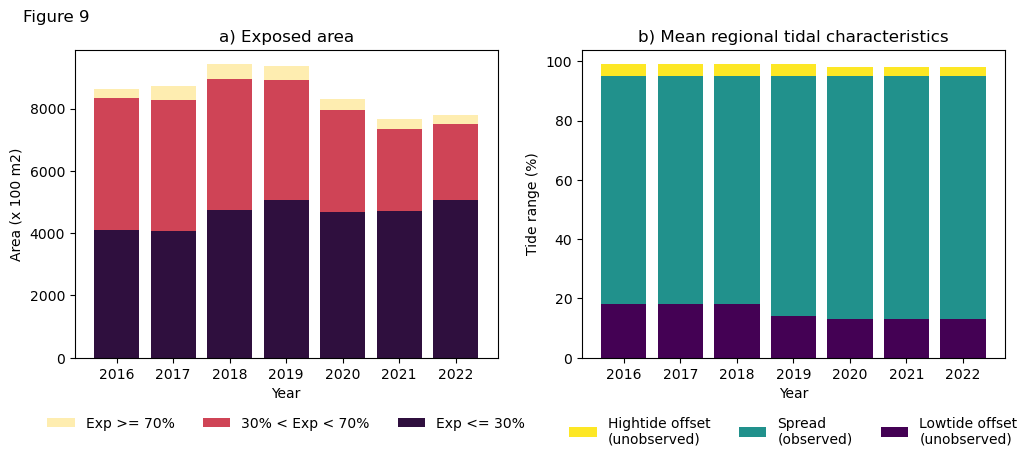

In [20]:
# Plot a summary of the changes in exposed area over time

# Prepare exposure data, grouping values based on exposure time
a = ds.exposure.count(dim=("x", "y")).values
b = ds.exposure.where(ds.exposure < 70).count(dim=("x", "y")).values
c = ds.exposure.where(ds.exposure <= 30).count(dim=("x", "y")).values

# Prepare offset and spread data, as the mean per year in the area of interest
spread = ds.time, ds.ta_spread.mean(dim=["x", "y"])
offl = ds.time, ds.ta_offset_low.mean(dim=["x", "y"])
offh = ds.time, ds.ta_offset_high.mean(dim=["x", "y"])

# Prepare the date range
dates = np.datetime_as_string(ds.time.values, unit="Y")

# Identify color schemes for each dataset
cmap = cmocean.cm.matter_r
cmap_offset = plt.cm.viridis

# Prepare the figures to plot side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the data
ax[0].bar(dates, a, label="Exp >= 70%", color=cmap(1.0))
ax[0].bar(dates, b, label="30% < Exp < 70%", color=cmap(0.5))
ax[0].bar(dates, c, label="Exp <= 30%", color=cmap(0.0))

ax[1].bar(
    dates,
    offh[1] + spread[1] + offl[1],
    label="Hightide offset\n(unobserved)",
    color=cmap_offset(1.0),
)
ax[1].bar(
    dates, spread[1] + offl[1], label="Spread\n(observed)", color=cmap_offset(0.5)
)
ax[1].bar(dates, offl[1], label="Lowtide offset\n(unobserved)", color=cmap_offset(0.0))

# Prepare the legends
ax[0].legend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, -0.15), frameon=False)
ax[1].legend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, -0.15), frameon=False)

# Prepare the labels
ax[0].set_ylabel("Area (x 100 m2)")
ax[0].set_xlabel("Year")
ax[1].set_ylabel("Tide range (%)")
ax[1].set_xlabel("Year")

# Set the figure subtitles
ax[0].set_title("a) Exposed area")
ax[1].set_title("b) Mean regional tidal characteristics")

# Set the plot title
fig.suptitle("Figure 9", x=0.11)

plt.show()

#### Interpretation

Like the other datasets in the DEA Intertidal product suite, the multi-temporal DEA Intertidal Exposure dataset can by used to compare landscape changes over time.

The DEA Intertidal Exposure animation (Figure 8b), comparing the changing distribution of intertidal exposure patterns over time, demonstrated the dynamicism of this case study area and that the total observable intertidal area in this region is in flux.

In figure 10, regional summaries quantify the changes in the animation (Figure 8b).
Figure 10a broadly classifies the intertidal area into high exposure regions (exposed for 70 % of the time or more), medium exposure (exposed between 30 % and 70 % of the time) and low exposure regions (exposed 30 % of the time or less).
Summarising the area occupied by these regions over time (Figure 9a), there was a small increase in the proportion of the low exposure region, following the sandbank breach in 2017.
Conversely, in the years following 2019, there was a decrease in the total area of both the medium exposed intertidal zone as well as the overall intertidal area, while the total area of high exposure remained fairly consistent over time.

To support the interpretation of DEA Intertidal Exposure, whose extrema values are closely linked to satellite observations of the top and bottom of the tidal frame, figure 9b summarises the annual mean tidal characteristics for the region.
Although the hightide offset was fairly uniform at this location across the timeseries, there was a small increase in the satellite observed spread of tidal values from 2019 onwards (Figure 9b).
This correlated with a small decrease in the lowtide offset, meaning that satellites observed more of the lower tide range in these years than previously.

However, the continuing environmental changes in the Carnarvon channel region (Figure 7a) were significantly more influential on the exposure patterns of the intertidal zone during this timeseries than the underlying tidal characteristics (Figure 9b).
It is important to remember that the epochs reported in DEA Intertidal are a composite of the overlapping 3 year period and that the influence of the sandspit breakthrough in 2017 may be more noticeable in the following 2018 timestep.
It is therefore probable that the detected changes in the exposed intertidal zone during 2016 to 2022 were caused by the mobilisation and redistribution of sediments in the Carnarvon Fascine channel area.
As sediments were eroded from the medium exposed proportion of the intertidal zone, they were likely redistributed at lower elevations resulting in an increase in the area of low exposure.
Similarly, the overall decrease in the area of intertidal zone over the time series is likely due to the transport and loss of sediment out of the Carnarvon system. 

# Export the data

To download the data you've been exploring in this notebook in a cloud-optimised geotiff format, run the following cell.
As the dataset contains multiple years of data, each containing multiple datasets, a for-loop is used which will export each timestep as a single GeoTIFF file, named by the date of the timestep and downloadable by right clicking on the files in the folder from which you opened this notebook.

In [21]:
for i in range(len(ds.time)):
    
    # We will use the date of the satellite image to name the GeoTIFF
    date = ds.isel(time=i).time.dt.strftime("%Y-%m-%d").data
    print(f"Writing {date}")

    # Convert current time step into a `xarray.DataArray`
    singletimestamp_da = ds.isel(time=i).to_array()

    # Write GeoTIFF
    write_cog(geo_im=singletimestamp_da, fname=f"{date}.tif", overwrite=True)

Writing 2016-07-01
Writing 2017-07-02
Writing 2018-07-02
Writing 2019-07-02
Writing 2020-07-01
Writing 2021-07-02
Writing 2022-07-02


***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** April 2024

**Compatible datacube version:** 

In [22]:
print(datacube.__version__)

1.8.17


## Tags - TODO
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)